1. Дан массив целых чисел nums и целое число target. Написать функцию, возвращающую индексы элементов, дающих в сумме число target?
2. Предполагается, что в каждом массиве имеется не больше одной пары дающих в сумме заданное число target. Нельзя использовать один и тот же элемент дважды?


In [88]:
def simple_get_index_for_target(nums, target):
    for x in nums:
        for y in nums:
            if x + y == target:
                if x != y:
                    return nums.index(x), nums.index(y)
                else:
                    ind1 = nums.index(x)
                    nums.remove(x)
                    ind2 = nums.index(y) + 1
                    return ind1, ind2
    return None

In [80]:
def get_index_for_target(nums, target):
    from collections import defaultdict
    indexes = dict()
    for ind, val in enumerate(nums):
        if val in indexes.keys():
            indexes[val].append(ind)
        else:
            indexes[val] = [ind]
    
    for first_val in indexes.keys():
        second_val = target - first_val
        if second_val in indexes.keys():
            if second_val != first_val:
                return indexes[first_val][0], indexes[second_val][0]
            else:
                return indexes[first_val][0], indexes[first_val][1]
    return None

In [95]:
def test_func(func):
    tests = [[[1, 2, 3, 45, 53, 12], 15], [[0, 1, 2, 4, 5, 24], 29], 
             [[1, 2, 3, 45, 53, 12, 2, 4, 4], 8], 
             [[1, 2, 3, 45, 53, 12, 2, 4, 10, 12, 4], 8],
             [[0, 22, 2, 4, 5, 24], 22], [[0, 22, 2, 4, 5, 24], 222]]
    answ = [(2, 5), (4, 5), (7, 8), (7, 10), (0, 1), None]
    for i in range(len(tests)):
        if func(*tests[i]) != answ[i]:
            raise Exception(f'test {i+1} failed')

In [96]:
test_func(get_index_for_target)

In [97]:
test_func(simple_get_index_for_target)

Математическая задача 2

Положим $E(X) = 8%$, $\sigma = 4%$, $n = 16$. Найдем 99% доверительный интервал при условии, что X ~ Norm: \
$$
E(X) - t_γ\frac{\sigma}{\sqrt{n}} < \alpha < E(X) + t_γ\frac{\sigma}{\sqrt{n}}
$$
$$
Ф(t_γ) = 0,99/2 = 0,495 => t_γ \approx 2.58
$$
$$
8 - 2.58 \cdot \frac{4}{\sqrt{16}} < \alpha < 8 + 2.58 \cdot \frac{4}{\sqrt{16}}
$$
$$
5.42 < \alpha < 10.58
$$
Ответ: (5.42; 10.58)

Математическая задача 3


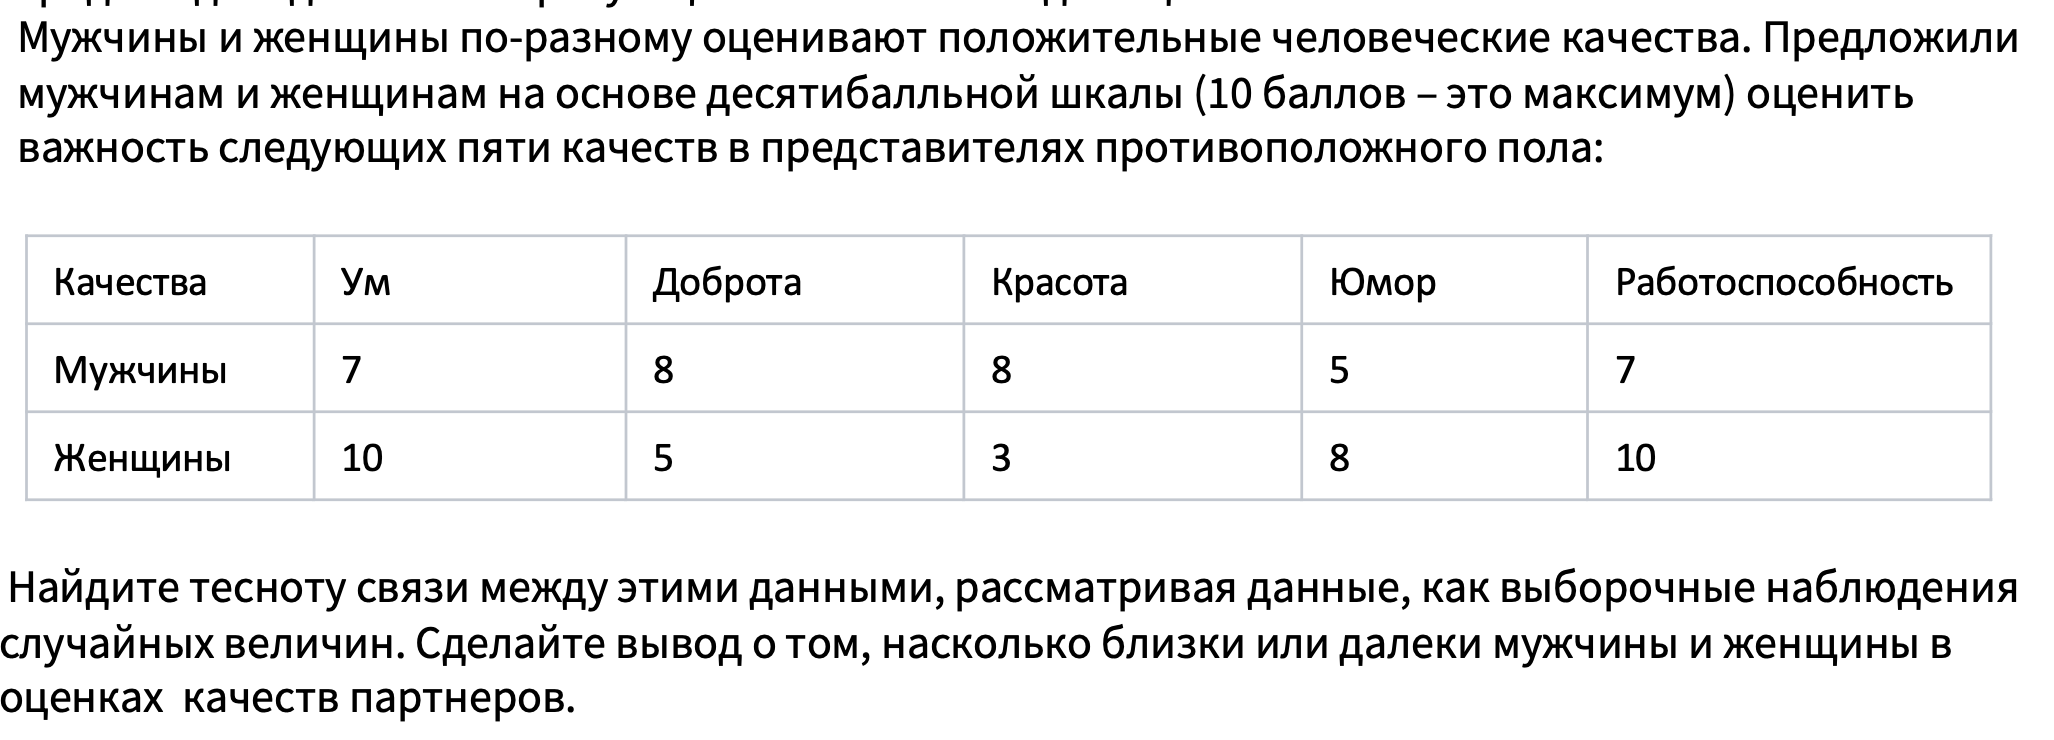

Пусть M – мужчины, G – женщины. Тогда посмотрим на тесноту связи с помощью коэффициента корреляции, если он не равен нулю, то это будет свидетельствовать о наличии линейной зависимости между данными. Для вычислений в качестве калькулятора используем Python, а затем еще и найдем с помощью встроенных функций те же параметры, чтобы убедиться в результатах
$$
\overline{M} = \frac{1}{n}\sum{M} = 7
$$
$$
\overline{G} = \frac{1}{n}\sum{G} = 7.2
$$
$$
\sqrt{\sum(M-\overline{M})^2} = 2.449489742783178
$$
$$
\sqrt{\sum(M-\overline{M})^2} = 6.2289646009589745
$$
$$
r = \frac{Cov(M, G)}{\sigma_M \sigma_G} = \frac{\sum(M-\overline{M})(G-\overline{G})}{\sqrt{\sum(M-\overline{M})^2(G-\overline{G})^2}} = -0.5243225050930764
$$

Итак, найденный отрицательный коэффициент корреляции говорит о наличии средней линейной зависимости. Причем чем ниже оцениваю качества женщины, тем выше их оценивают мужчины.

In [11]:
import numpy as np

In [36]:
boy, girl = np.array([7, 8, 8, 5, 7]), np.array([10, 5, 3, 8, 10])

In [34]:
n = 5
m_hat, g_hat = 1/n*sum(boy), 1/n*sum(girl)
cov = sum((boy - m_hat) * (girl - g_hat))
sm, sg = np.sqrt(sum((boy-m_hat)**2)), np.sqrt(sum((girl - g_hat)**2))
cov/(sm*sg)

-0.5243225050930764

In [43]:
m_hat, g_hat

(7.0, 7.2)

In [44]:
sm, sg

(2.449489742783178, 6.2289646009589745)

In [37]:
np.corrcoef(boy, girl)[0][1]

-0.5243225050930764

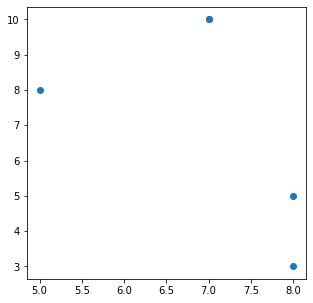

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x = boy, y = girl)

plt.show()